<a href="https://colab.research.google.com/github/ShubhamJadhav03/AIML/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('/content/sample_data/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [11]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])

In [12]:
df['cluster'] =y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [14]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [18]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
df['cluster'] = y_predicted

In [20]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [21]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

In [22]:
from matplotlib import pyplot as plt

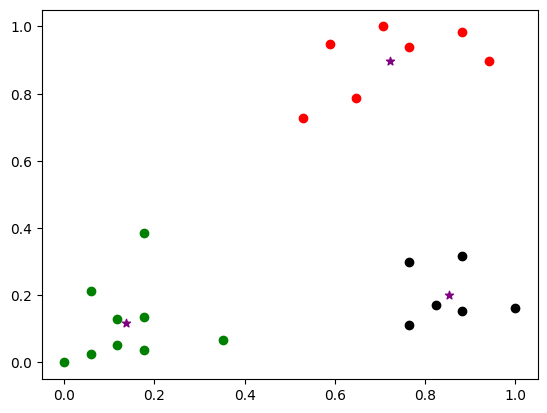

In [26]:
plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df3.Age, df3['Income($)'], color = 'black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')


ELBOW TECHNIQUE

In [32]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters= k)
  km.fit(df[['Age', 'Income($)']])
  sse.append(km.inertia_)

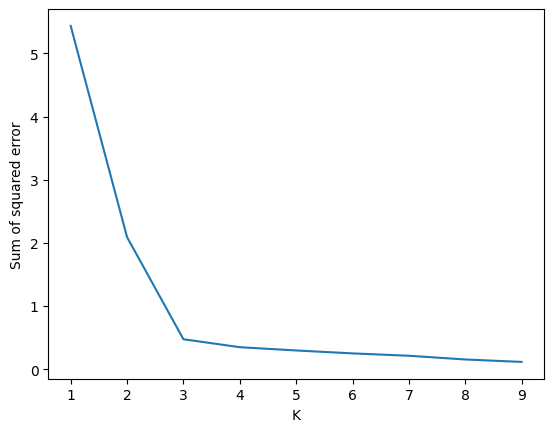

In [33]:
# prompt: plot sse

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)